In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
columns= [
    'id',
    'age',
    'gender',
    'height',
    'weight',
    'ap_hi',
    'ap_lo',
    'cholesterol',
    'gluc',
    'smoke',
    'alco',
    'active',
    'cardio'
]

df = pd.read_csv("medical_examination.csv", names=columns, sep=',', skipinitialspace=True)

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70001 entries, 0 to 70000
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           70001 non-null  object
 1   age          70001 non-null  object
 2   gender       70001 non-null  object
 3   height       70001 non-null  object
 4   weight       70001 non-null  object
 5   ap_hi        70001 non-null  object
 6   ap_lo        70001 non-null  object
 7   cholesterol  70001 non-null  object
 8   gluc         70001 non-null  object
 9   smoke        70001 non-null  object
 10  alco         70001 non-null  object
 11  active       70001 non-null  object
 12  cardio       70001 non-null  object
dtypes: object(13)
memory usage: 6.9+ MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70001,70001,70001,70001,70001,70001,70001,70001,70001,70001,70001,70001,70001
unique,70001,11205,7,168,396,207,215,7,7,5,5,5,5
top,id,18236,1,165,65.0,120,80,1,1,0,0,1,1
freq,1,31,42670,5501,3621,25883,32600,49017,55653,59771,62040,52666,32774


In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
f = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

##  Add Overweight Column
Calculate BMI and mark patients as overweight (1) or not (0).


In [11]:
df['height'] = pd.to_numeric(df['height'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')

df = df.dropna(subset=['height', 'weight'])

df['height'] = df['height'].astype(int)
df['weight'] = df['weight'].astype(int)


In [12]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
df['overweight'] = (df['BMI'] > 25).astype(int)
df.drop(columns='BMI', inplace=True)


In [13]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1,0,18393,2,168,62,110,80,1,1,0,0,1,0,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1,0
4,3,17623,2,169,82,150,100,1,1,0,0,1,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0,0


In [14]:
df = df.drop(columns=['id'])

In [15]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1,18393,2,168,62,110,80,1,1,0,0,1,0,0
2,20228,1,156,85,140,90,3,1,0,0,1,1,1
3,18857,1,165,64,130,70,3,1,0,0,0,1,0
4,17623,2,169,82,150,100,1,1,0,0,1,1,1
5,17474,1,156,56,100,60,1,1,0,0,0,0,0


##  Normalize Data
0 = normal/good, 1 = above normal/bad for cholesterol and glucose.


In [17]:
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['gluc'] = pd.to_numeric(df['gluc'], errors='coerce')

df = df.dropna(subset=['cholesterol', 'gluc'])

df['cholesterol'] = df['cholesterol'].astype(int)
df['gluc'] = df['gluc'].astype(int)


In [18]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)


In [21]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
1,18393,2,168,62,110,80,0,0,0,0,1,0,0
2,20228,1,156,85,140,90,1,0,0,0,1,1,1
3,18857,1,165,64,130,70,1,0,0,0,0,1,0
4,17623,2,169,82,150,100,0,0,0,0,1,1,1
5,17474,1,156,56,100,60,0,0,0,0,0,0,0


##  Explore Relationships
Check correlations between cardio disease, lifestyle, and medical measurements.


In [22]:
df.corr()['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.238159
cholesterol    0.205536
weight         0.181657
overweight     0.157835
gluc           0.090876
ap_lo          0.065719
ap_hi          0.054475
gender         0.007953
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

##  Categorical Plot
Visualize counts of categorical variables by cardio disease.


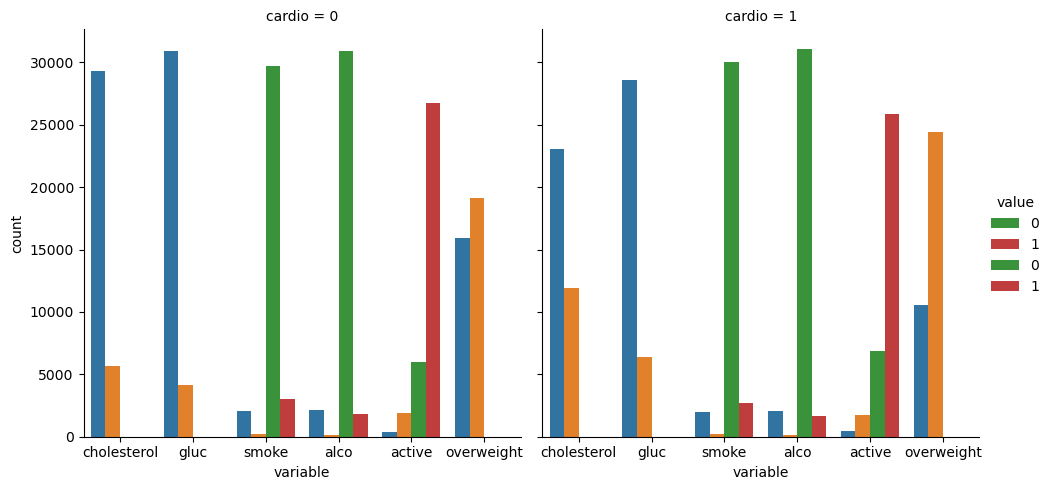

In [32]:
df_cat = pd.melt(df,
                 id_vars=['cardio'],
                 value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


fig = sns.catplot(
    data=df_cat,
    kind='count',
    x='variable',
    hue='value',
    col='cardio'
).fig
plt.show()


##  Clean Data
Remove incorrect and extreme values for accurate correlation analysis.


In [24]:
df_heat = df.copy()
df_heat = df_heat[df_heat['ap_lo'] <= df_heat['ap_hi']]
df_heat = df_heat[
    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
    (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
]


##  Heatmap
Show correlations between features using a heatmap.


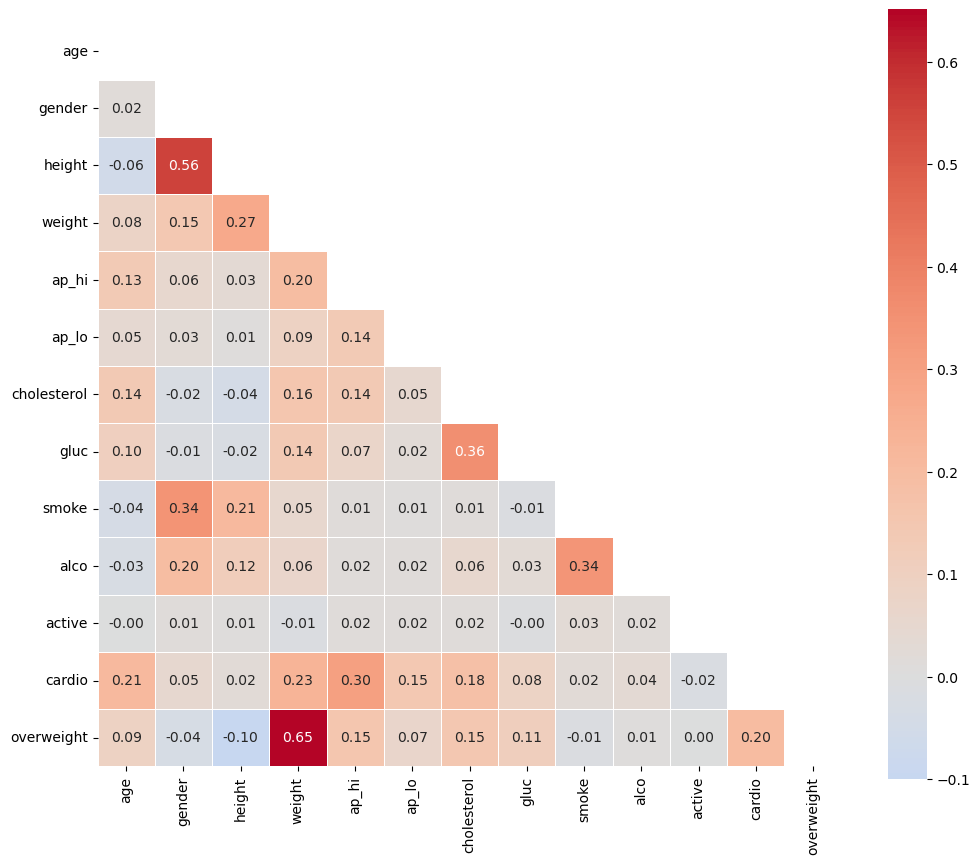

In [25]:
corr = df_heat.corr()
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", center=0, square=True, linewidths=0.5, cmap="coolwarm")
plt.show()


##  Age and Cardio Disease
Visualize how the prevalence of cardiovascular disease changes with age.


In [27]:
df['cardio'] = pd.to_numeric(df['cardio'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

df = df.dropna(subset=['cardio', 'age'])

df['cardio'] = df['cardio'].astype(int)
df['age'] = df['age'].astype(int)

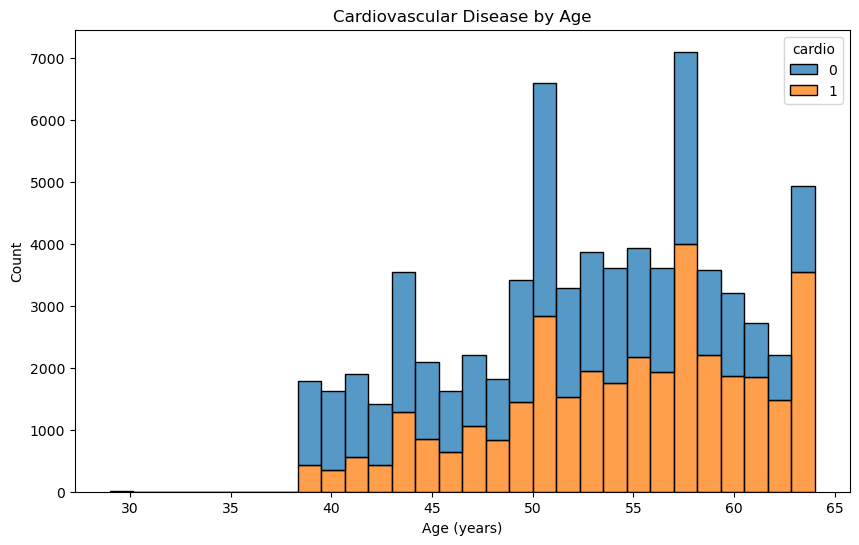

In [28]:
df['age_years'] = (df['age'] / 365).astype(int)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age_years', hue='cardio', multiple='stack', bins=30)
plt.xlabel("Age (years)")
plt.title("Cardiovascular Disease by Age")
plt.show()


##  Gender and Lifestyle Habits
Compare smoking, alcohol, and activity levels between genders.


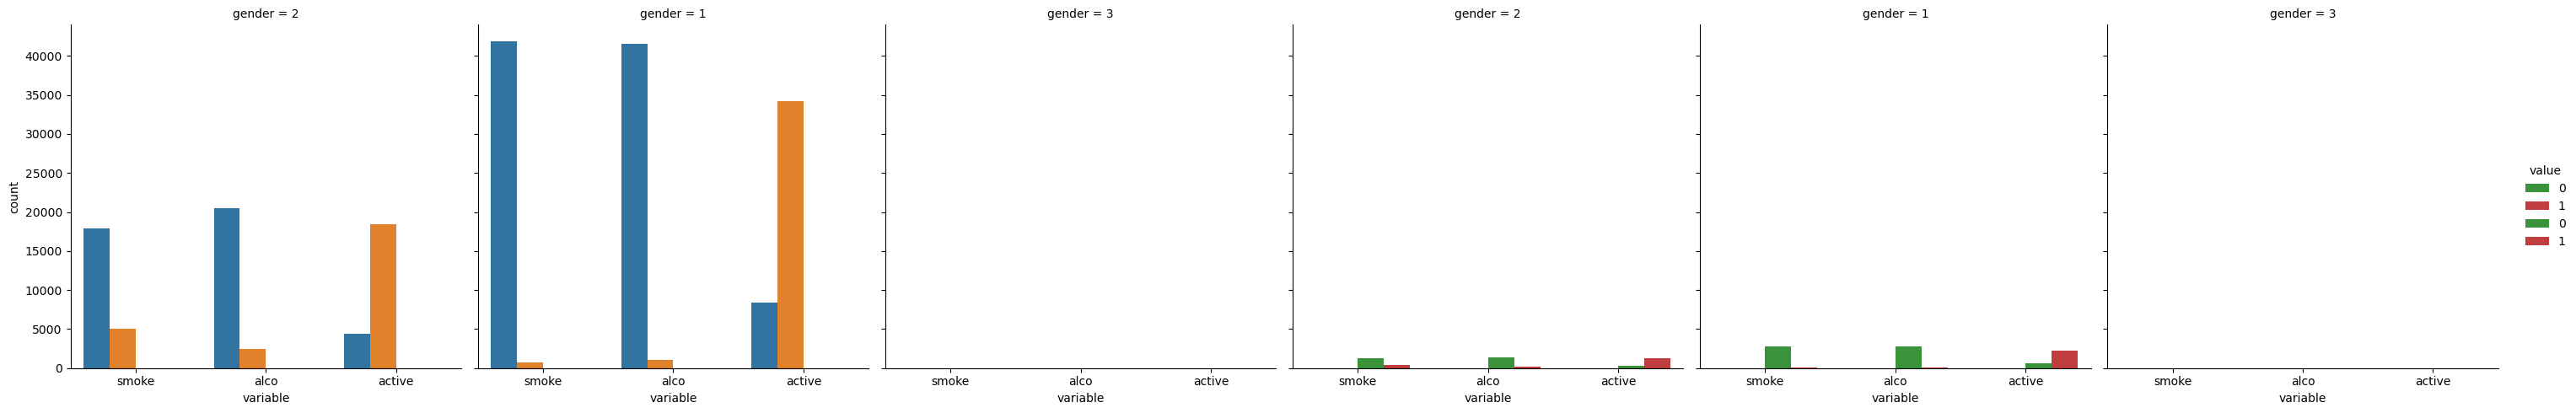

In [30]:
import warnings
warnings.filterwarnings("ignore")

df_gender = pd.melt(df, id_vars=['gender'], value_vars=['smoke', 'alco', 'active'])
sns.catplot(data=df_gender, kind='count', x='variable', hue='value', col='gender')
plt.show()


##  BMI and Lifestyle Habits
Check if overweight is related to smoking, alcohol intake, or physical activity.



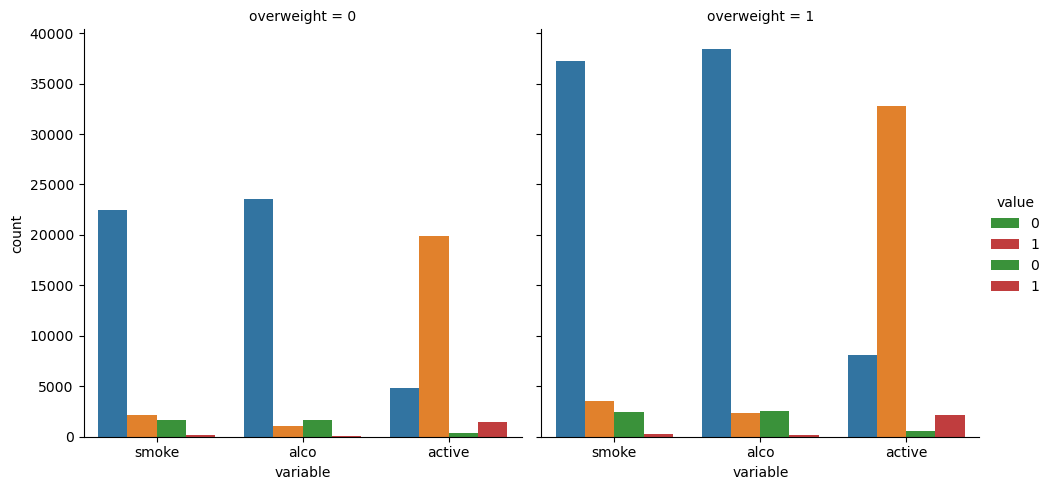

In [37]:
df_bmi_lifestyle = pd.melt(df, id_vars=['overweight'], value_vars=['smoke', 'alco', 'active'])

sns.catplot(data=df_bmi_lifestyle, kind='count', x='variable', hue='value', col='overweight')
plt.show()


##  Glucose and Cholesterol
Check if high glucose levels are associated with high cholesterol.


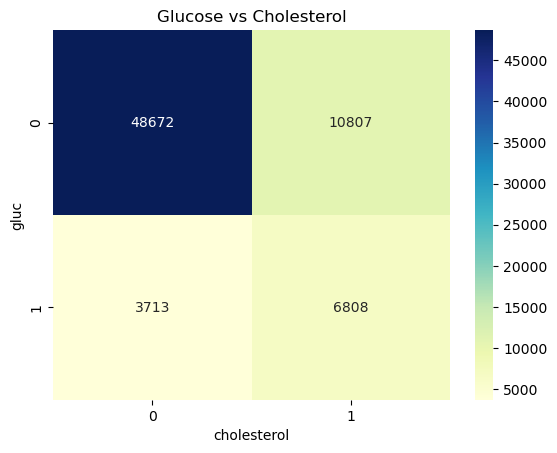

In [38]:
cross_tab = pd.crosstab(df['gluc'], df['cholesterol'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Glucose vs Cholesterol")
plt.show()


## Final Analysis & Insights

This project explored medical examination data to identify patterns and relationships related to cardiovascular disease. After cleaning, normalizing, and visualizing the dataset, several key insights were identified.

### Key Medical Findings
- **Blood pressure (systolic and diastolic)** shows a strong positive correlation with cardiovascular disease, confirming it as one of the most critical risk factors.
- **Overweight patients** are more likely to have cardiovascular disease, highlighting the impact of body weight on heart health.
- **High cholesterol and glucose levels** frequently appear together, suggesting clustering of metabolic risk factors.

### Lifestyle Impact
- Patients with **lower physical activity levels** tend to show higher rates of overweight and cardiovascular disease.
- **Smoking and alcohol intake** vary by gender and lifestyle, contributing indirectly to cardiovascular risk when combined with other factors.

### Demographic Patterns
- The prevalence of cardiovascular disease **increases with age**, especially in middle-aged and older patients.
- Gender-based differences in lifestyle habits (smoking, alcohol, activity) may partially explain differences in cardiovascular risk.

### Correlation Insights
- Strong correlations were observed between:
  - Weight and systolic blood pressure
  - Overweight and glucose levels
  - Blood pressure measurements (ap_hi and ap_lo)
- These relationships emphasize how interconnected medical and lifestyle factors influence heart disease.

### Conclusion
The analysis demonstrates that cardiovascular disease is not driven by a single factor, but rather by a combination of **age, body measurements, blood markers, and lifestyle choices**. Data visualization and correlation analysis provide valuable insights that can support preventive healthcare strategies and data-driven medical decision-making.
